# 4. Scipy로 공부하는 확률 변수

## 01장. 이산 확률 분포

## 2. 이항 분포 (Binomial distribution)

In [11]:
import scipy as sp
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import matplotlib as mpl
from scipy import stats

In [17]:
mpl.rcParams["font.family"]
mpl.matplotlib_fname()
import matplotlib.font_manager as fm
font_location = "/Library/Fonts/AppleGothic.ttf"
font_name = fm.FontProperties(fname=font_location).get_name()
print(font_name)
mpl.rc('font', family=font_name)

AppleGothic


- - -
### 1. 이항분포

- 성공확률이 theta인 베르누이 시도를 N번 해서 성공할 횟수를 확률 변수로 가진다.
- 확률변수는 0~N까지 N+1개를 가진다.
- N번 게임하는게 한 세트이다. N번 게임해서 몇번 이겼는지가 확률 변수로 설정됨

In [9]:
%%latex
$Y \sim Bern(y;\theta)$ 인 베르누이 시도를 N번 했을 때, $X \sim Bin(x; N,\theta)$
X는 이항분포를 따르는 확률 변수이다.

<IPython.core.display.Latex object>

- - -
### 2. Scipy를 이용한 이항분포의 시뮬레이션

In [33]:
# 이항분포를 따르는 객체 만들기

N = 10
theta = 0.6 # 앞면이 나오는 확률을 높게 설정해서 오른쪽으로 좀 붙었다.
rv = sp.stats.binom(N, theta)
rv

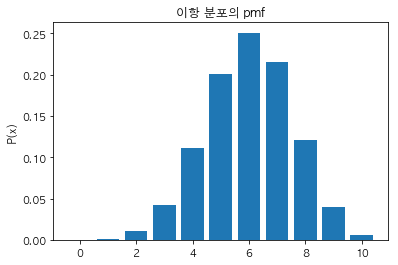

In [34]:
# 이항 분포의 pmf 만들어서 객체 생성시 설정한 N, theta에 맞는 이상적 확률 값 확인
# 이길 확률 즉, theta 값 조절하게 되면 총 N번 게임 해서 이길 확률도 변화하기 때문에 이항분포의 pmf 그래프도 좌우로 움직이게 된다.

xx = np.arange(N + 1)
plt.bar(xx, rv.pmf(xx), align="center")
plt.ylabel("P(x)")
plt.title("이항 분포의 pmf")
plt.show()

- - -

In [31]:
# 이항분포 객체를 이용해서 실제 데이터를 뽑은 샘플링 작업
np.random.seed(0)
x = rv.rvs(100)
x

array([ 6,  5,  6,  6,  6,  5,  6,  4,  3,  6,  5,  6,  6,  4,  8,  8,  9,
        5,  5,  4,  3,  5,  6,  5,  8,  5,  8,  4,  6,  6,  7,  5,  6,  6,
        9,  6,  6,  6,  4,  5,  7,  6,  5,  8,  5,  5,  7,  8,  7,  7,  6,
        6,  2,  8,  7,  8,  5,  7,  6,  7,  8,  8,  5,  8,  7,  7,  5,  8,
        4,  8,  3,  6,  3,  6,  5,  9,  7,  8,  7,  8,  7,  6,  8,  5,  6,
        7,  6,  8,  6,  4,  7,  5,  8,  5,  7,  7,  6,  9,  5, 10])

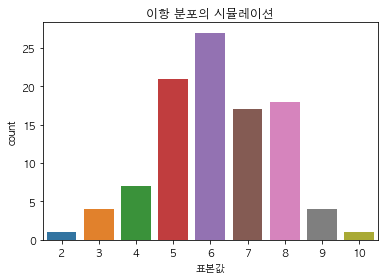

In [35]:
# 직접 샘플링 한 것의 분포를 살펴보자
sns.countplot(x)
plt.title("이항 분포의 시뮬레이션")
plt.xlabel("표본값")
plt.show()

In [36]:
# 이상적 분포와 실제 샘플링한 데이터의 분포를 동일 plot에 비교해보기

y = np.bincount(x, minlength=N+1)/float(len(x))
df = pd.DataFrame({"이론": rv.pmf(xx), "시뮬레이션": y}).stack()
df = df.reset_index()
df.columns = ["표본값", "유형", "비율"]
df.pivot("표본값", "유형", "비율")
df

,표본값,유형,비율
0,0,시뮬레이션,0.000000
1,0,이론,0.000105
2,1,시뮬레이션,0.000000
3,1,이론,0.001573
4,2,시뮬레이션,0.010000
5,2,이론,0.010617
6,3,시뮬레이션,0.040000
7,3,이론,0.042467
8,4,시뮬레이션,0.070000
9,4,이론,0.111477


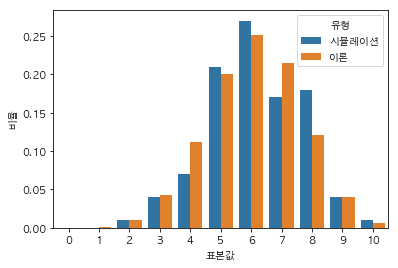

In [31]:
sns.barplot(x="표본값", y="비율", hue="유형", data=df)
plt.show()

- - -
### 연습문제

이항 확률 분포의 모수가 다음과 같을 경우에 각각 샘플을 생성한 후 기댓값과 분산을 구하고 앞의 예제와 같이 확률 밀도 함수와 비교한 카운트 플롯을 그린다.

샘플의 갯수가 10개인 경우와 1000개인 경우에 대해 각각 위의 계산을 한다.

- θ = 0.5, N = 5
- θ = 0.9, N = 20

In [37]:
theta1=0.5
N1=5
rv1 = sp.stats.binom(N1,theta1)
rv1

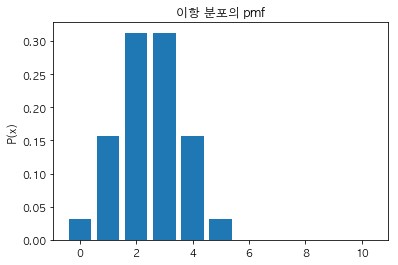

In [55]:
# theta가 0.5일 때 5번 시행시 성공할 횟수의 확률을 pmf로 나타냄
xx = np.arange(N1 + 1)
plt.bar(xx, rv1.pmf(xx), align="center")
plt.ylabel("P(x)")
plt.title("이항 분포의 pmf")
plt.show()

- - -

In [59]:
theta2=0.9
N2=20
rv2 = sp.stats.binom(N2,theta2)
rv2

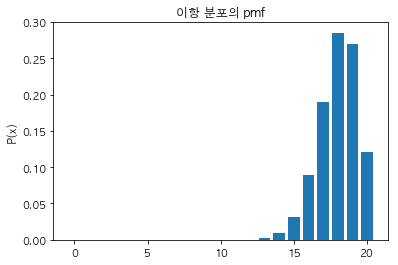

In [61]:
# theta가 0.9일 때 20번 시행시 성공할 횟수의 확률을 pmf로 나타냄
xx = np.arange(N2 + 1)
plt.bar(xx, rv2.pmf(xx), align="center")
plt.ylabel("P(x)")
plt.title("이항 분포의 pmf")
plt.show()

In [62]:
x11 = rv1.rvs(10)
x12 = rv1.rvs(1000)

In [63]:
x21 = rv2.rvs(10)
x22 = rv2.rvs(1000)

In [64]:
np.mean(x11), np.mean(x12)

(2.5, 2.529)

In [65]:
np.mean(x21), np.mean(x22)

(17.6, 18.091)

In [66]:
np.var(x11), np.var(x12)

(1.65, 1.215159)

In [67]:
np.var(x21), np.var(x22)

(1.8400000000000003, 1.7247189999999997)

- - -

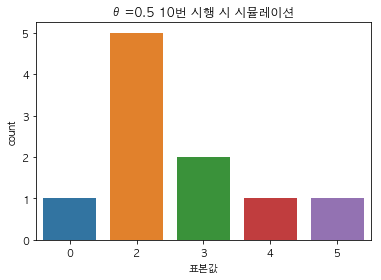

In [68]:
sns.countplot(x11)
plt.title("θ=0.5 10번 시행 시 시뮬레이션")
plt.xlabel("표본값")
plt.show()

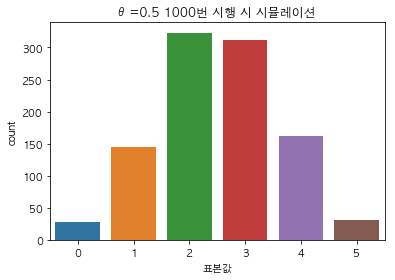

In [69]:
sns.countplot(x12)
plt.title("θ=0.5 1000번 시행 시 시뮬레이션")
plt.xlabel("표본값")
plt.show()

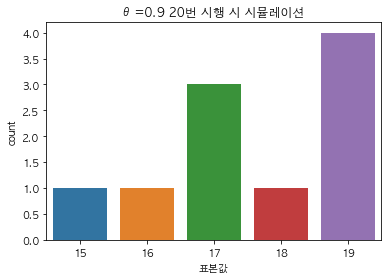

In [75]:
# 이길 확률이 0.9인 베르누이를 20번 시행하는 이항변수를 10개 샘플링 시 성공한 횟수의 확률을 나타냄
sns.countplot(x21)
plt.title("θ=0.9 20번 시행 시 시뮬레이션")
plt.xlabel("표본값")
plt.show()

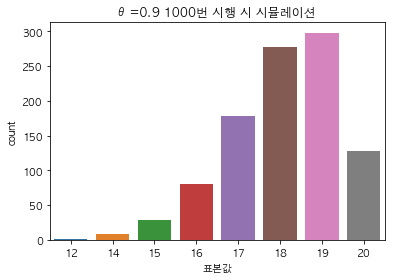

In [76]:
# 이길 확률이 0.9인 베르누이를 20번 시행했을 때 이길 횟수, 1000번 샘플링 했을 때 성공한 횟수의 확률을 나타냄
sns.countplot(x22)
plt.title("θ=0.9 1000번 시행 시 시뮬레이션")
plt.xlabel("표본값")
plt.show()

- - - 

In [ ]:
# 이상적인 확률 분포와 시뮬레이션 분포를 비교해보기

In [82]:
# 샘플 갯수 10개인 경우
xx = np.arange(N1 + 1)
y11 = np.bincount(x11, minlength=N1+1)/float(len(x11))
df11 = pd.DataFrame({"이론": rv1.pmf(xx), "시뮬레이션": y11}).stack()
df11 = df11.reset_index()
df11.columns = ["표본값", "유형", "비율"]
df11.pivot("표본값", "유형", "비율")
df11

,표본값,유형,비율
0,0,시뮬레이션,0.10000
1,0,이론,0.03125
2,1,시뮬레이션,0.00000
3,1,이론,0.15625
4,2,시뮬레이션,0.50000
5,2,이론,0.31250
6,3,시뮬레이션,0.20000
7,3,이론,0.31250
8,4,시뮬레이션,0.10000
9,4,이론,0.15625


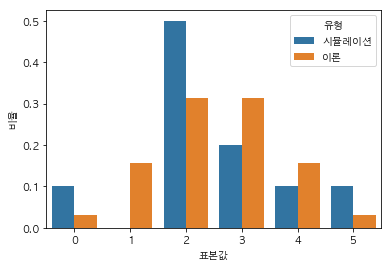

In [83]:
sns.barplot(x="표본값", y="비율", hue="유형", data=df11)
plt.show()

In [86]:
# 샘플 갯수 1000개인 경우
xx = np.arange(N1 + 1)
y12 = np.bincount(x12, minlength=N1+1)/float(len(x12))
df12 = pd.DataFrame({"이론": rv1.pmf(xx), "시뮬레이션": y12}).stack()
df12 = df12.reset_index()
df12.columns = ["표본값", "유형", "비율"]
df12.pivot("표본값", "유형", "비율")
df12

,표본값,유형,비율
0,0,시뮬레이션,0.02800
1,0,이론,0.03125
2,1,시뮬레이션,0.14400
3,1,이론,0.15625
4,2,시뮬레이션,0.32300
5,2,이론,0.31250
6,3,시뮬레이션,0.31200
7,3,이론,0.31250
8,4,시뮬레이션,0.16200
9,4,이론,0.15625


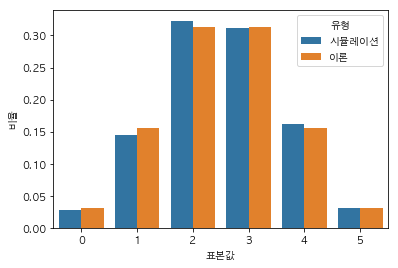

In [85]:
sns.barplot(x="표본값", y="비율", hue="유형", data=df12)
plt.show()

- - -

In [91]:
# 샘플 갯수 10개인 경우
xx = np.arange(N2 + 1)
y21 = np.bincount(x21, minlength=N2+1)/float(len(x21))
df21 = pd.DataFrame({"이론": rv2.pmf(xx), "시뮬레이션": y21}).stack()
df21 = df21.reset_index()
df21.columns = ["표본값", "유형", "비율"]
df21.pivot("표본값", "유형", "비율")
df21.tail()

,표본값,유형,비율
37,18,이론,0.285180
38,19,시뮬레이션,0.400000
39,19,이론,0.270170
40,20,시뮬레이션,0.000000
41,20,이론,0.121577


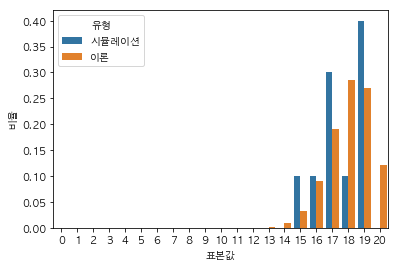

In [89]:
sns.barplot(x="표본값", y="비율", hue="유형", data=df21)
plt.show()

In [92]:
# 샘플 갯수 1000개인 경우
xx = np.arange(N2 + 1)
y22 = np.bincount(x22, minlength=N2+1)/float(len(x22))
df22 = pd.DataFrame({"이론": rv2.pmf(xx), "시뮬레이션": y22}).stack()
df22 = df22.reset_index()
df22.columns = ["표본값", "유형", "비율"]
df22.pivot("표본값", "유형", "비율")
df22.tail()

,표본값,유형,비율
37,18,이론,0.285180
38,19,시뮬레이션,0.298000
39,19,이론,0.270170
40,20,시뮬레이션,0.128000
41,20,이론,0.121577


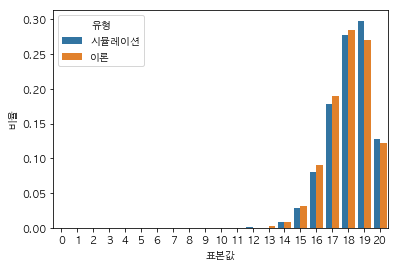

In [90]:
sns.barplot(x="표본값", y="비율", hue="유형", data=df22)
plt.show()

두 경우 모두 각 성공 확률에 따른 베르누이 시행을 N번 시행시 성공 횟수를 나타내는 이항변수를 생성 시 샘플의 갯수가 많을 수록 이상적인 이항분포의 특성과 가까운 값들을 가지게 된다.